# Cardio Vascular Disease Prediction

Cardiovascular disease(CVDs) are the leading cause of death golbally,taking an estimated 17.9 miilion lives each year.
CVD are the group of disorders 0f the heart and blood vessels and include coronary heart disease,cerebrovascular disease,rheumatic heart disease and other conditions.
more than foue uot of five CVD deaths are due to heart and strokes,and one third of these death occurs permaturely in people under 70 yearss of age.

# problem statement:




the prediction approach using Machine Learning Algorithm to classify the patient to be healthy or suffering from cardiovascular disease on the thre diffrent attributes

# Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## import dataset 

In [2]:
CVD=pd.read_csv("C:\\Users\\saura\\OneDrive\\Desktop\\CVD_Disease.csv")


In [3]:
CVD.set_index("id",inplace=True)

In [4]:
CVD = CVD.rename(columns={'TenYearCHD(Coronary heart disease )': 'HeartDisease'})

In [5]:
CVD.shape

(3390, 16)

In [6]:
CVD

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease
id,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,MALE,SMOKER,3.0,NO,NO,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


# # #Dataset Atribute explanation

Features:




In [7]:
CVD.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease
id,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [8]:
CVD.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease
id,,,,,,,,,,,,,,,,
3385,60,1.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,MALE,SMOKER,3.0,NO,NO,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,MALE,NOT A SMOKER,0.0,NaN,NO,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


# Data cleaning

In [9]:
CVD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3390 non-null   int64  
 1   education              3303 non-null   float64
 2   sex                    3390 non-null   object 
 3   is_smoking             3390 non-null   object 
 4   cigsPerDay             3368 non-null   float64
 5   BPMeds                 3346 non-null   object 
 6   prevalentStroke        3390 non-null   object 
 7   prevalentHyp           3390 non-null   int64  
 8   diabetes               3390 non-null   int64  
 9   totChol                3352 non-null   float64
 10  sysBP                  3390 non-null   float64
 11  diaBP                  3390 non-null   float64
 12  BMI(Body Mass Index )  3376 non-null   float64
 13  heartRate              3389 non-null   float64
 14  glucose                3086 non-null   float64
 15  Hear

In [10]:
CVD.isna().sum()

age                        0
education                 87
sex                        0
is_smoking                 0
cigsPerDay                22
BPMeds                    44
prevalentStroke            0
prevalentHyp               0
diabetes                   0
totChol                   38
sysBP                      0
diaBP                      0
BMI(Body Mass Index )     14
heartRate                  1
glucose                  304
HeartDisease               0
dtype: int64

 creating new column ofage_group based on the age
 
 
 
Age Group will be divided as 

age <= 5:Child

5 <Age < 18:Teen

18 <= Age < 60: Adult

Age > 60 : Senior_Citizen



In [11]:
CVD.loc[CVD['age'] <= 5, "Age_Group"] = 'Child'
CVD.loc[(CVD['age'] >5 ) & (CVD['age'] < 18), "Age_Group"] = 'Teen'
CVD.loc[CVD['age'] >=18 & (CVD['age'] < 60), "Age_Group"] = 'Adult'
CVD.loc[CVD['age'] >=60 , "Age_Group"] = 'Senior_Citizen'

In [12]:
CVD.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease,Age_Group
id,,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Senior_Citizen
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Adult
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Adult
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Adult
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Senior_Citizen


<AxesSubplot:xlabel='Age_Group', ylabel='BMI(Body Mass Index )'>

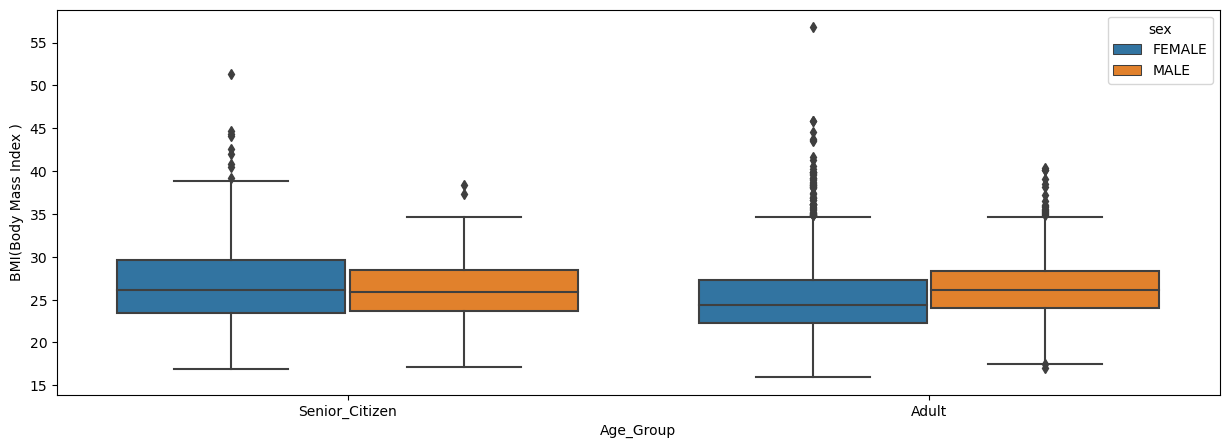

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x=CVD["Age_Group"],y=CVD["BMI(Body Mass Index )"],hue = CVD["sex"])

Repacing the missing valuesin continuos data with 

Age

TotalCholestrol

Systolic blood pressure

diastolic blood pressure

Body mass index

Heartrate

Glucose

Cigerates Per Day

In [14]:
num_col=["age","totChol","sysBP","diaBP","BMI(Body Mass Index )","heartRate","glucose","cigsPerDay"]
for col in num_col:
    CVD[col]=pd.to_numeric(CVD[col])
    CVD[col].fillna(CVD[col].median(),inplace=True)
CVD.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease,Age_Group
id,,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Senior_Citizen
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Adult
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Adult
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Adult
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Senior_Citizen
5,61,3.0,FEMALE,NOT A SMOKER,0.0,NO,NO,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,Senior_Citizen
6,61,1.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0,Senior_Citizen
7,36,4.0,MALE,SMOKER,35.0,NO,NO,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0,Adult
8,41,2.0,FEMALE,SMOKER,20.0,NaN,NO,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0,Adult


In [15]:
CVD.isna().sum()

age                       0
education                87
sex                       0
is_smoking                0
cigsPerDay                0
BPMeds                   44
prevalentStroke           0
prevalentHyp              0
diabetes                  0
totChol                   0
sysBP                     0
diaBP                     0
BMI(Body Mass Index )     0
heartRate                 0
glucose                   0
HeartDisease              0
Age_Group                 0
dtype: int64

Repacing missing values in categorical column with mode

categorical columnis

BPMeds

Education

In [16]:
num_col2=["BPMeds","education"]
for col2 in num_col2:
    #CVD[col2]=pd.to_numeric(CVD[col2])
    CVD[col2].fillna(CVD[col2].mode()[0], inplace=True,)
CVD.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease,Age_Group
id,,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Senior_Citizen
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Adult
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Adult
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Adult
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Senior_Citizen


In [17]:
CVD.isna().sum()

age                      0
education                0
sex                      0
is_smoking               0
cigsPerDay               0
BPMeds                   0
prevalentStroke          0
prevalentHyp             0
diabetes                 0
totChol                  0
sysBP                    0
diaBP                    0
BMI(Body Mass Index )    0
heartRate                0
glucose                  0
HeartDisease             0
Age_Group                0
dtype: int64

# to check duplicates

In [18]:
CVD.duplicated().sum()

0

In [19]:
CVD["sex"].value_counts()

FEMALE    1923
MALE      1467
Name: sex, dtype: int64

# Exploratory Data Analytics

In [20]:
CVD.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI(Body Mass Index )', 'heartRate', 'glucose',
       'HeartDisease', 'Age_Group'],
      dtype='object')

# boxplot for continous data variable

In [21]:
def boxplot(df,col):
    #sns.boxplot(column=[col])
    sns.boxplot(df[col],color="red")
    plt.grid(False)
    plt.show()

In [22]:
c=["age","totChol","sysBP","diaBP","BMI(Body Mass Index )","heartRate","glucose","cigsPerDay"]

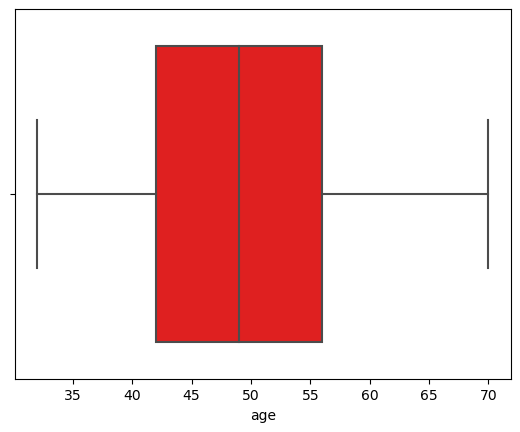

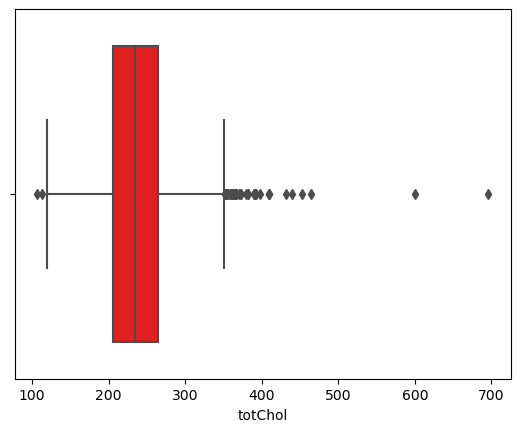

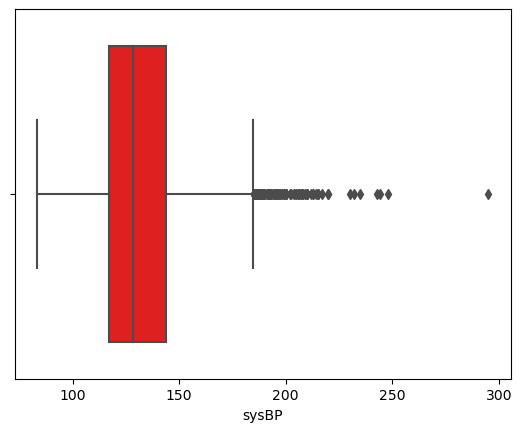

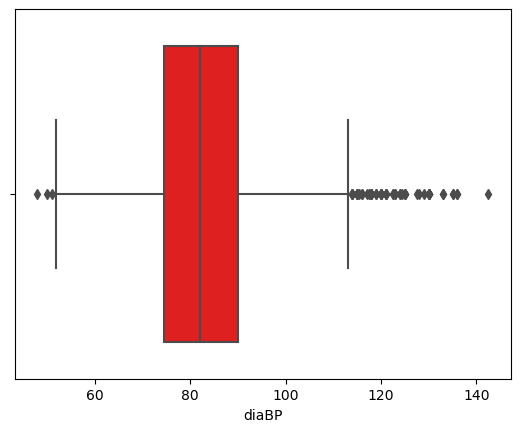

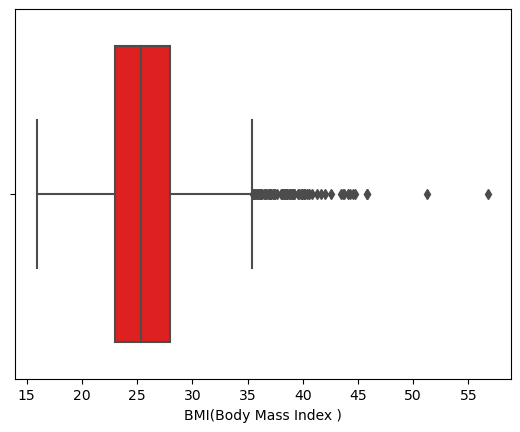

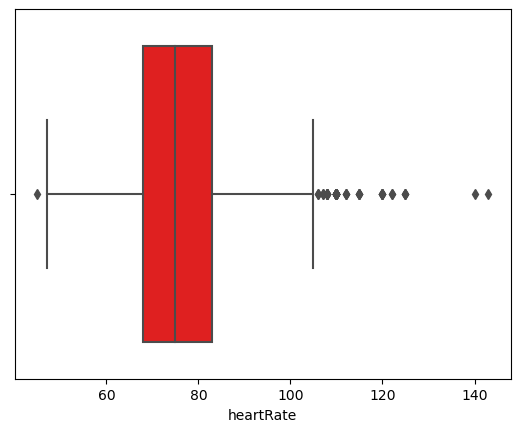

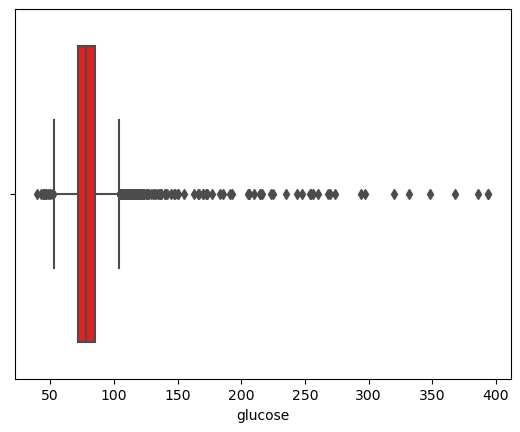

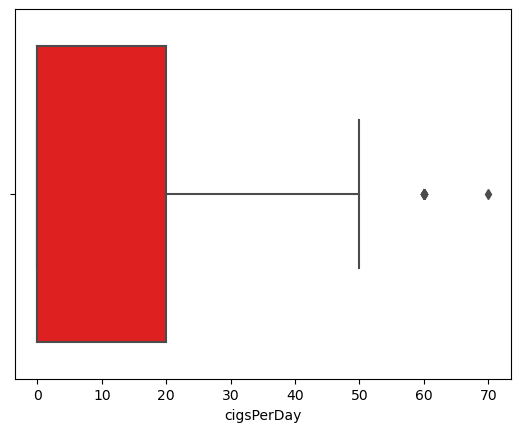

In [23]:
for i in c:
    boxplot(CVD,i)

# Heatmap

finding correlation between features

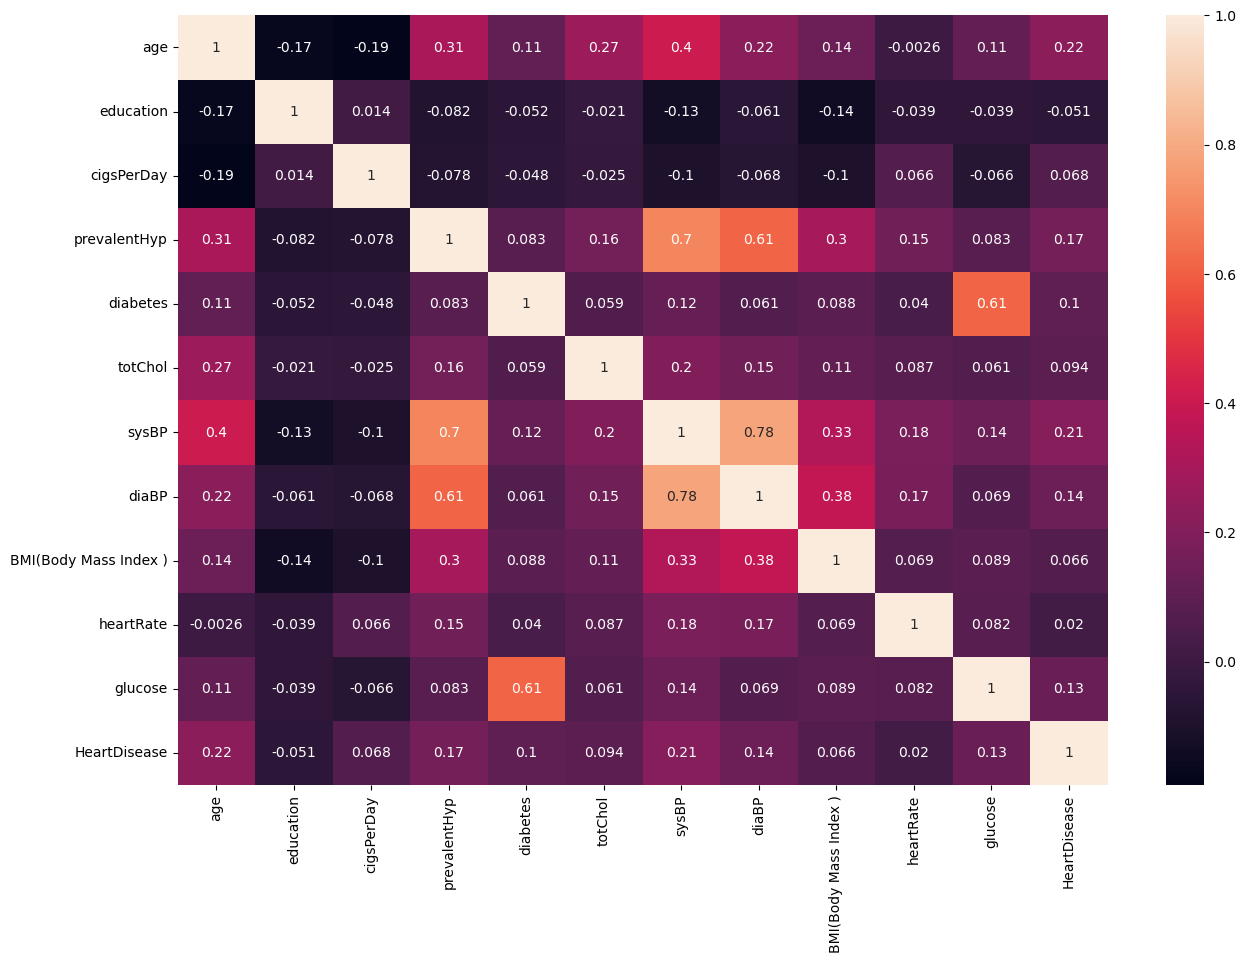

In [24]:
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(CVD.corr(),annot = True)
plt.show()

# countplot

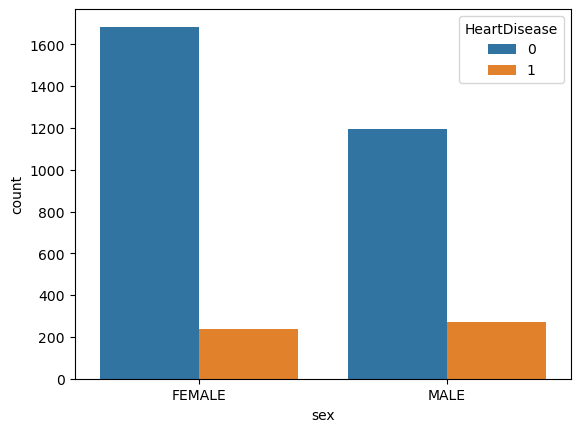

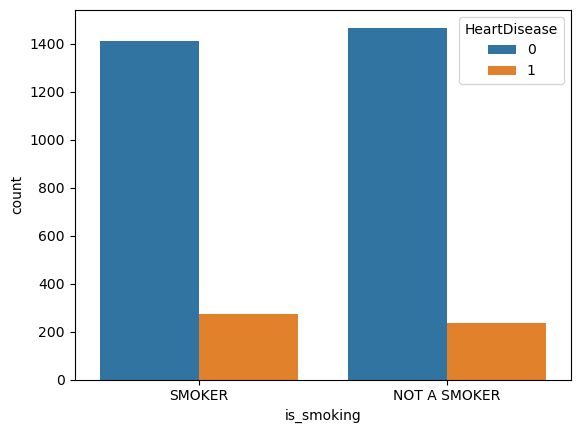

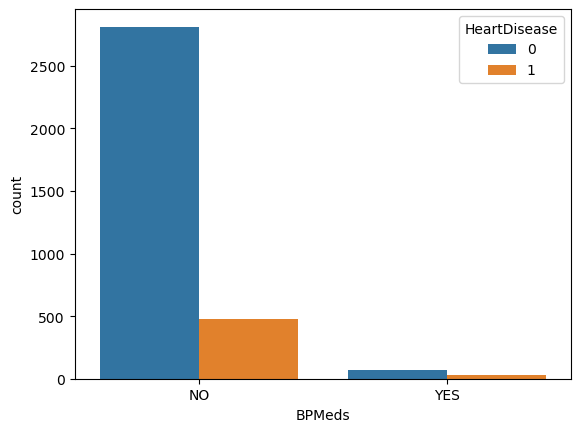

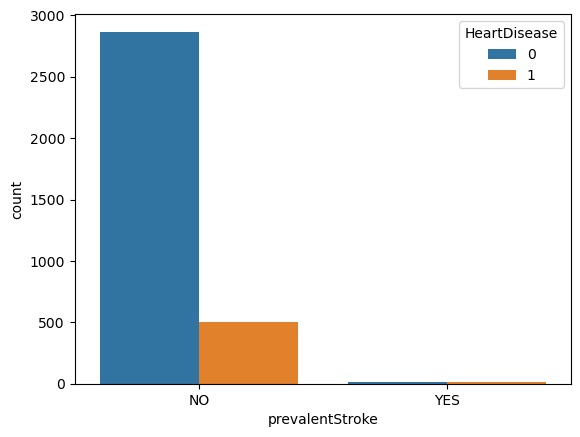

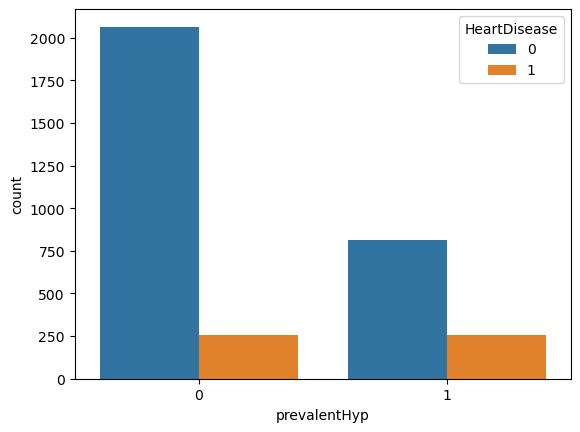

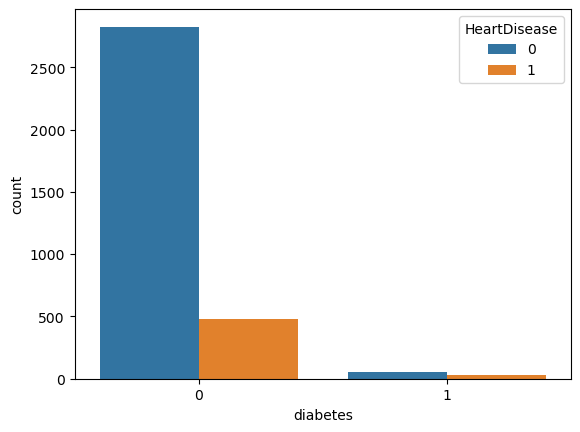

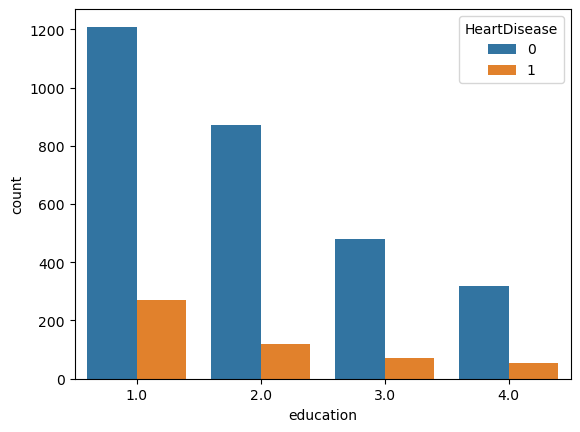

In [25]:
categorical = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"]

for i in categorical:
    sns.countplot(CVD[i], hue = CVD['HeartDisease'])
    plt.show()

# Continous vs continous

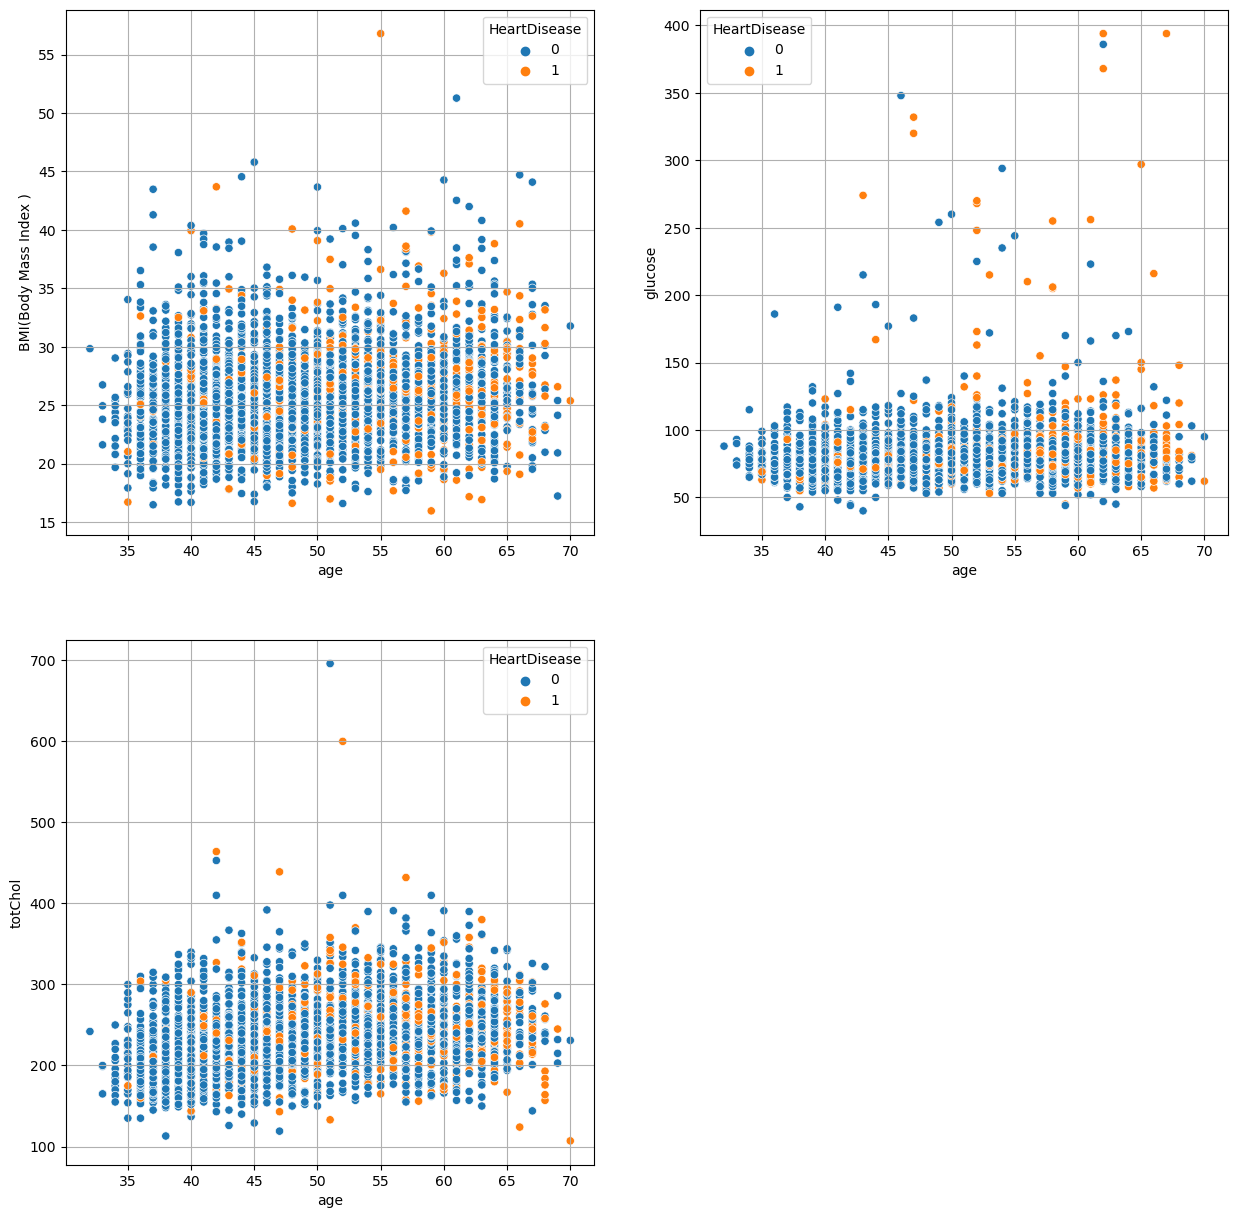

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(data=CVD,x='age',y='BMI(Body Mass Index )',hue='HeartDisease')
plt.plot()
plt.grid(True)
plt.subplot(2,2,2)
sns.scatterplot(data=CVD,x='age',y='glucose',hue='HeartDisease')
plt.plot()
plt.grid(True)
plt.subplot(2,2,3)
sns.scatterplot(data=CVD,x='age',y='totChol',hue='HeartDisease')
plt.plot()
plt.grid(True)

plt.savefig('cont_vs_cont_variable')

# categorical vs continuos

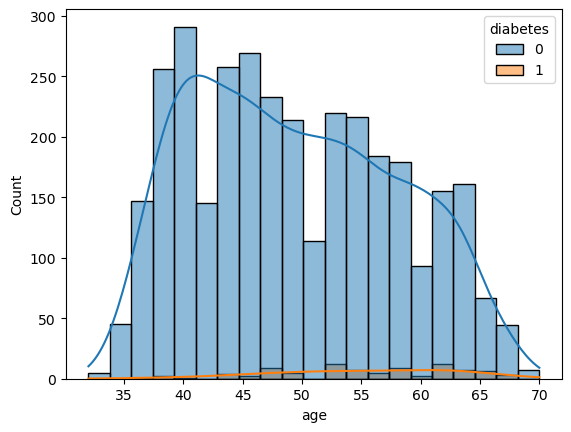

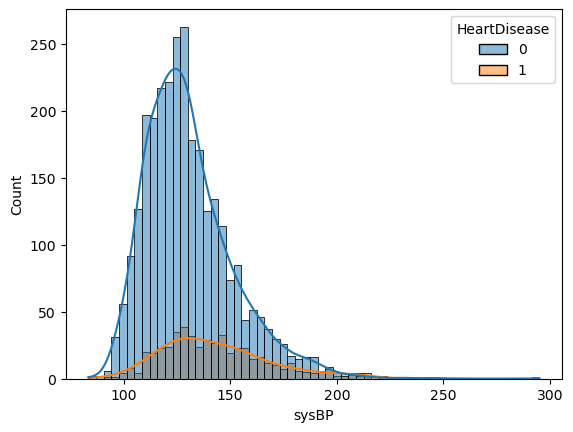

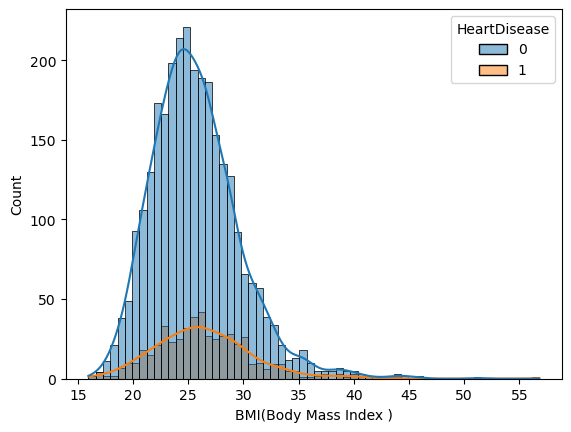

In [27]:
sns.histplot(data=CVD,x='age',hue='diabetes',alpha = 0.5,kde = True)
plt.savefig('age vs diabetes')
plt.show()

sns.histplot(data=CVD,x='sysBP',hue='HeartDisease',alpha = 0.5,kde = True)
plt.savefig('systolic BP Vs heartDisease')
plt.show()

sns.histplot(data=CVD,x='BMI(Body Mass Index )',hue='HeartDisease',alpha = 0.5,kde = True)
plt.savefig('Body Mass Index Vs heartDisease')
plt.show()

# feature engineering

In [28]:
CVD.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease,Age_Group
id,,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Senior_Citizen
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Adult
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Adult
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Adult
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Senior_Citizen


In [29]:
CVD=CVD.drop(['Age_Group'],axis=1)
CVD.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,HeartDisease
id,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [30]:
#creating dummies for the categorical variable

categorical = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"]

dummies=pd.get_dummies(CVD[['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',"education"]], drop_first=True)

dummies

,prevalentHyp,diabetes,education,sex_MALE,is_smoking_SMOKER,BPMeds_YES,prevalentStroke_YES
id,,,,,,,
0,0,0,2.0,0,1,0,0
1,1,0,4.0,1,0,0,0
2,0,0,1.0,0,1,0,0
3,1,0,1.0,1,1,0,0
4,0,0,1.0,0,1,0,0
...,...,...,...,...,...,...,...
3385,0,0,1.0,0,0,0,0
3386,0,0,1.0,0,0,0,0
3387,1,0,3.0,1,1,0,0


In [31]:
CVD = pd.concat([CVD, dummies], axis=1)

In [32]:
CVD

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,heartRate,glucose,HeartDisease,prevalentHyp,diabetes,education,sex_MALE,is_smoking_SMOKER,BPMeds_YES,prevalentStroke_YES
id,,,,,,,,,,,,,,,,,,,,,
0,64,2.0,FEMALE,SMOKER,3.0,NO,NO,0,0,221.0,...,90.0,80.0,1,0,0,2.0,0,1,0,0
1,36,4.0,MALE,NOT A SMOKER,0.0,NO,NO,1,0,212.0,...,72.0,75.0,0,1,0,4.0,1,0,0,0
2,46,1.0,FEMALE,SMOKER,10.0,NO,NO,0,0,250.0,...,88.0,94.0,0,0,0,1.0,0,1,0,0
3,50,1.0,MALE,SMOKER,20.0,NO,NO,1,0,233.0,...,68.0,94.0,1,1,0,1.0,1,1,0,0
4,64,1.0,FEMALE,SMOKER,30.0,NO,NO,0,0,241.0,...,70.0,77.0,0,0,0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,261.0,...,70.0,103.0,0,0,0,1.0,0,0,0,0
3386,46,1.0,FEMALE,NOT A SMOKER,0.0,NO,NO,0,0,199.0,...,80.0,84.0,0,0,0,1.0,0,0,0,0
3387,44,3.0,MALE,SMOKER,3.0,NO,NO,1,0,352.0,...,73.0,72.0,1,1,0,3.0,1,1,0,0


In [33]:
CVD.drop(['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', "education"],axis=1,inplace=True)

# data distrubution analysis

over sampling technique

In [34]:
CVD["HeartDisease"].value_counts()

0    2879
1     511
Name: HeartDisease, dtype: int64

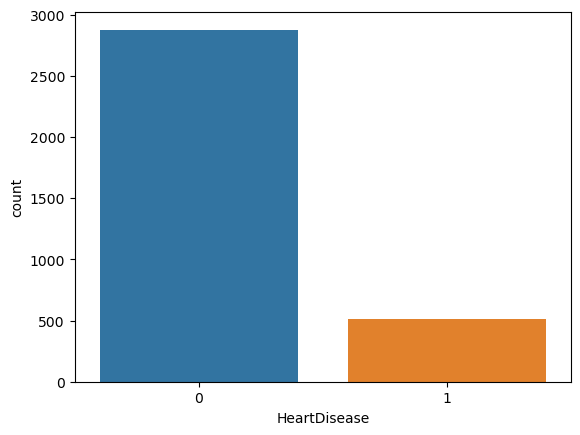

In [35]:
sns.countplot(x=CVD["HeartDisease"])
plt.show()

0 - Healthy

1 - HeartDisease

As you can see that there is huge imbalance in the dataset

This oversampling happens based on KNN algorithm who tries to create the new neighbours based on existing neighbour in minority class

Advantages of SMOTE

Minimize the problem of overfitting

No loss of data or useful information

# Implementation

class 0: (2879, 13)
class 1: (511, 13)
total values of 1 and 0: 0    2879
1    2879
Name: HeartDisease, dtype: int64


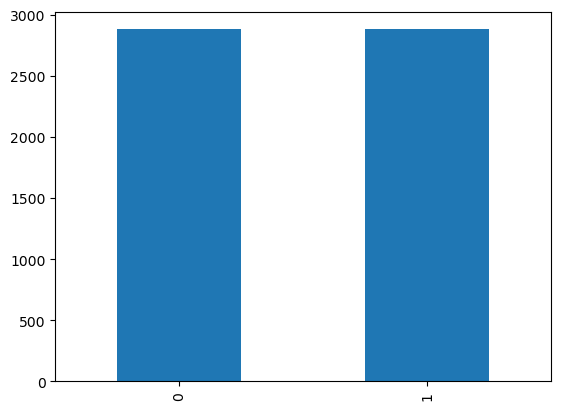

In [36]:
class_count_0, class_count_1 = CVD["HeartDisease"].value_counts()
# Separate class
class_0 = CVD[CVD["HeartDisease"] == 0]
class_1 = CVD[CVD["HeartDisease"] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
    
class_1_over = class_1.sample(class_count_0, replace=True)
CVD = pd.concat([class_0,class_1_over], axis=0)

print("total values of 1 and 0:",CVD["HeartDisease"].value_counts())

CVD["HeartDisease"].value_counts().plot(kind='bar')
plt.show()

# Mchine Learning Models

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X = CVD.drop(['HeartDisease'], axis=1)

X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI(Body Mass Index ),heartRate,glucose,sex_MALE,is_smoking_SMOKER,BPMeds_YES,prevalentStroke_YES
id,,,,,,,,,,,,
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,1,0,0,0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0
6,61,0.0,238.0,232.0,136.0,24.83,75.0,79.0,1,0,0,0
7,36,35.0,295.0,102.0,68.0,28.15,60.0,63.0,1,1,0,0


In [41]:
y = CVD['HeartDisease']

y.head()

id
1    0
2    0
4    0
6    0
7    0
Name: HeartDisease, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4030, 12), (4030,), (1728, 12), (1728,))

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions = dtree.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       893
           1       0.81      0.99      0.89       835

    accuracy                           0.88      1728
   macro avg       0.90      0.89      0.88      1728
weighted avg       0.90      0.88      0.88      1728



In [51]:
print(confusion_matrix(y_test,predictions))

[[700 193]
 [  9 826]]


<AxesSubplot:>

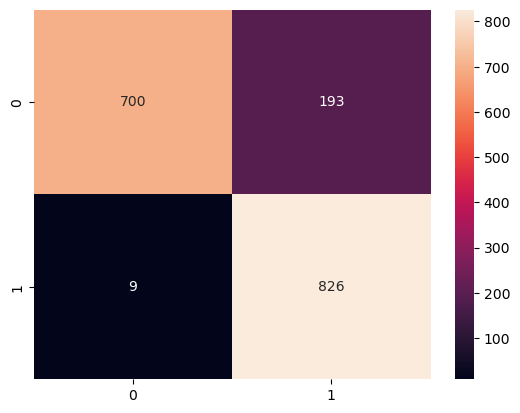

In [52]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True, fmt = "d")

# calculating accuracy

Accuracy = TP+TN/Total observation

Accuracy = 753+830/573+140+5+830 = 1583/1728 = 0.916 = 91%

In [53]:
def metrics_calculation(y_testing,pred):
    confusion_mat = confusion_matrix(y_testing, pred)
    TP = confusion_mat[0,0:1]
    FP = confusion_mat[0,1:2]
    FN = confusion_mat[1,0:1]
    TN = confusion_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    
    print("Confusion Matrix:\n",confusion_mat)
    print("Accuracy :",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    

In [54]:
metrics_calculation(y_test,predictions)

Confusion Matrix:
 [[700 193]
 [  9 826]]
Accuracy : [0.88310185]
Sensitivity : [0.98730606]
Specificity : [0.81059863]
Precision: [0.78387458]
Recall: [0.98730606]
F-score: [0.87390762]


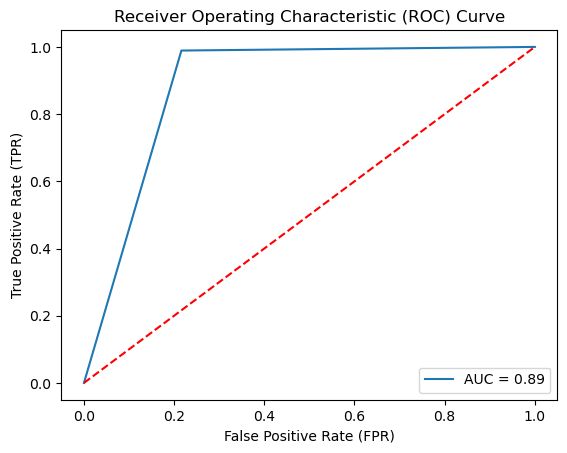

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,predictions)

auc_score = roc_auc_score(y_test,predictions)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=100)
randomfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
randomfc_pred = randomfc.predict(X_test)

In [58]:
print(confusion_matrix(y_test,randomfc_pred ))

[[835  58]
 [  9 826]]


In [59]:
print(classification_report(y_test,randomfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       893
           1       0.93      0.99      0.96       835

    accuracy                           0.96      1728
   macro avg       0.96      0.96      0.96      1728
weighted avg       0.96      0.96      0.96      1728



<AxesSubplot:>

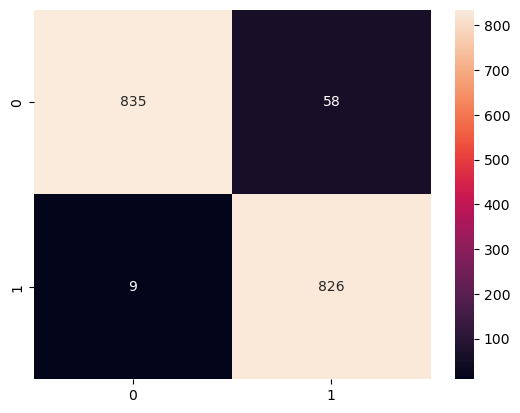

In [60]:
sns.heatmap(confusion_matrix(y_test,randomfc_pred), annot = True, fmt = "d")

In [61]:
metrics_calculation(y_test,randomfc_pred)

Confusion Matrix:
 [[835  58]
 [  9 826]]
Accuracy : [0.96122685]
Sensitivity : [0.98933649]
Specificity : [0.93438914]
Precision: [0.93505039]
Recall: [0.98933649]
F-score: [0.96142775]


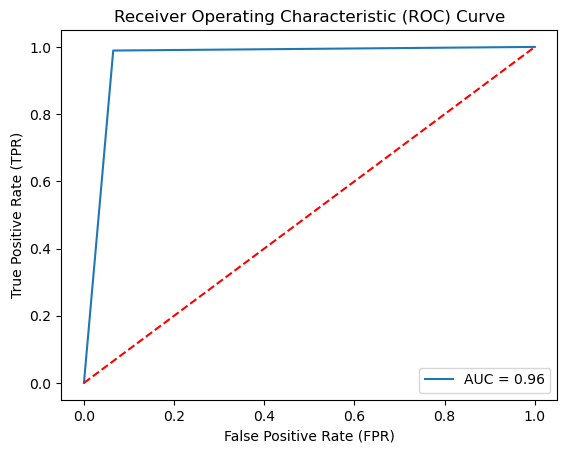

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,randomfc_pred)

auc_score = roc_auc_score(y_test,randomfc_pred)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       893
           1       0.65      0.68      0.66       835

    accuracy                           0.66      1728
   macro avg       0.66      0.66      0.66      1728
weighted avg       0.67      0.66      0.66      1728



In [65]:
print(confusion_matrix(y_test,lr_pred))

[[581 312]
 [268 567]]


<AxesSubplot:>

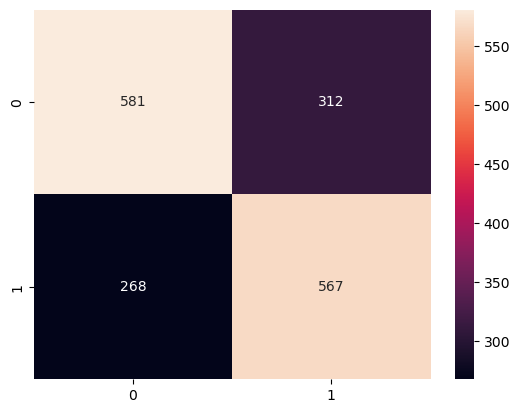

In [66]:
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True, fmt = "d")

In [67]:
metrics_calculation(y_test,lr_pred)

Confusion Matrix:
 [[581 312]
 [268 567]]
Accuracy : [0.66435185]
Sensitivity : [0.68433451]
Specificity : [0.64505119]
Precision: [0.6506159]
Recall: [0.68433451]
F-score: [0.66704937]


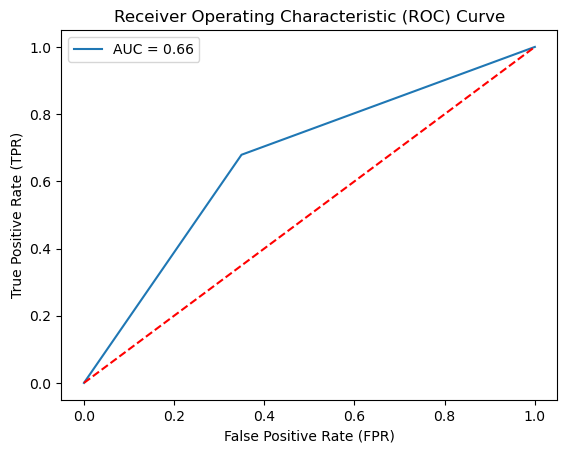

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,lr_pred)

auc_score = roc_auc_score(y_test,lr_pred)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# support vector machine

In [69]:
from sklearn.svm import SVC

In [70]:
svc = SVC()

In [71]:
svc.fit(X_train, y_train)

SVC()

In [72]:
y_pred_svc = svc.predict(X_test)

In [73]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[600, 293],
       [229, 606]], dtype=int64)

In [74]:
metrics_calculation(y_test, y_pred_svc)

Confusion Matrix:
 [[600 293]
 [229 606]]
Accuracy : [0.69791667]
Sensitivity : [0.72376357]
Specificity : [0.67408231]
Precision: [0.6718925]
Recall: [0.72376357]
F-score: [0.69686411]


<AxesSubplot:>

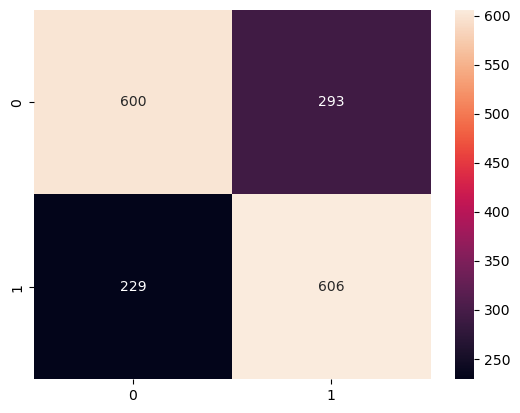

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot = True, fmt = "d")

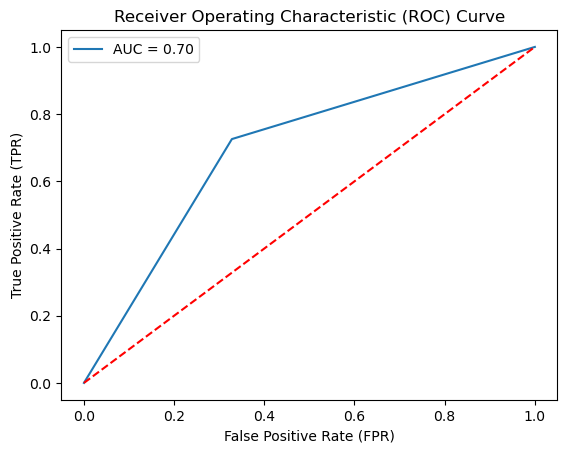

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,y_pred_svc)

auc_score = roc_auc_score(y_test,y_pred_svc)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# K Nearest Neighbhour

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier()

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred_knn = knn.predict(X_test)

In [81]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[595, 298],
       [105, 730]], dtype=int64)

In [82]:
metrics_calculation(y_test, y_pred_knn)

Confusion Matrix:
 [[595 298]
 [105 730]]
Accuracy : [0.76678241]
Sensitivity : [0.85]
Specificity : [0.71011673]
Precision: [0.66629339]
Recall: [0.85]
F-score: [0.7470182]


<AxesSubplot:>

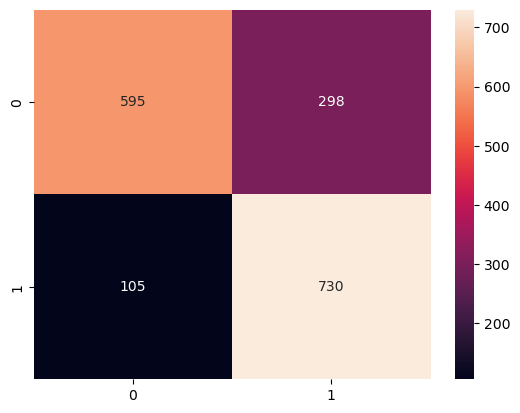

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot = True, fmt = "d")

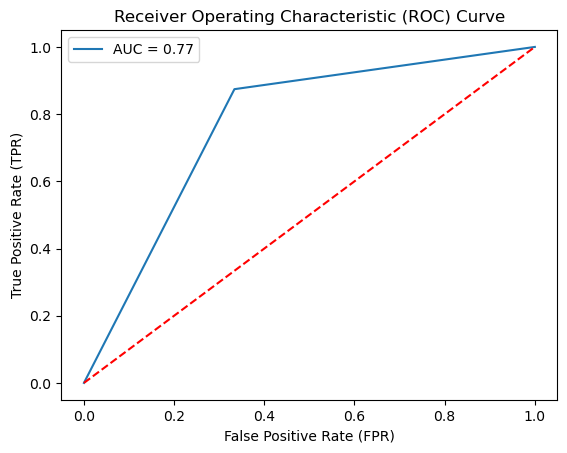

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,y_pred_knn)

auc_score = roc_auc_score(y_test,y_pred_knn)


plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# comparing the Accuracy of the algorithms

In [85]:
data={"Algorithm":["DecisonTree","RandomForest","LogisticReg","KNN","SVM"],"Accuracy":[91,95,67,69,78]}

In [86]:
df=pd.DataFrame(data)

In [87]:
df

,Algorithm,Accuracy
0,DecisonTree,91
1,RandomForest,95
2,LogisticReg,67
3,KNN,69
4,SVM,78


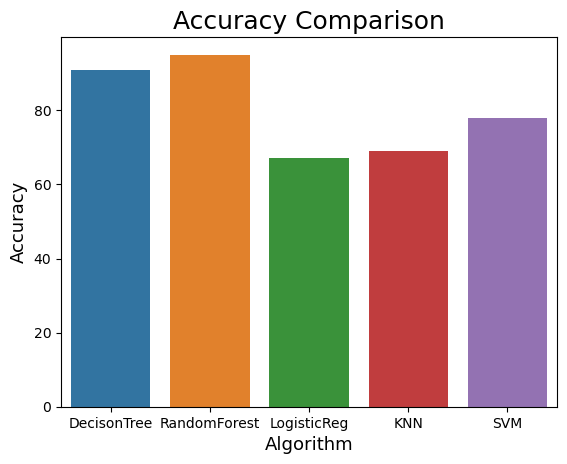

In [88]:
ax=sns.barplot(x=df["Algorithm"],y=df["Accuracy"])
ax.set_xlabel("Algorithm",size=13)
ax.set_ylabel("Accuracy",size=13)
plt.title("Accuracy Comparison",size=18)
plt.show()